<a href="https://colab.research.google.com/github/pulkitsingh/Pokedex/blob/master/original_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting Google Drive

In [0]:
# mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


### Importing Libraries 

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, GlobalAveragePooling2D, BatchNormalization, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD, Adam, RMSprop
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint
import os
from keras.models import load_model

Using TensorFlow backend.


### Loading Data

In [0]:
# directories for training and validation data
train_directory = 'original_data_clean/train'
validation_directory = 'original_data_clean/validation'

In [0]:
# making ImageDataGenerator instances for training and test data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, 
                                   zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
# loading the train and validation data
train_gen = train_datagen.flow_from_directory('original_data_clean/train',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              color_mode="rgb",                                            
                                              class_mode='categorical', 
                                              shuffle=True, seed=333)

test_gen = test_datagen.flow_from_directory('original_data_clean/validation',
                                            target_size=(224, 224),
                                            color_mode = "rgb",
                                            batch_size=32,
                                            class_mode='categorical', 
                                            shuffle=True, seed=333)


Found 8478 images belonging to 149 classes.
Found 2189 images belonging to 149 classes.


### Specifying the model

In [0]:
# specifying parameters
batch_size = 10
input_shape = (10, 224, 224, 3)
num_training_samples = 12903
num_test_samples = 3317

In [0]:
# specifying the model

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(149))
model.add(Activation('softmax'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss=categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 111, 111, 64)   

### Training the Model

In [0]:
# making a directory to save weights
import os
dir_name = 'pokemon_weights/original2'
#os.mkdir(dir_name)
path = os.path.join(os.getcwd(), dir_name)
print(path)

/content/gdrive/My Drive/pokemon_weights/original2


In [0]:
filepath = os.path.join(path, "model-{epoch:02d}.hdf5")
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, 
                             save_best_only=False, save_weights_only=True, 
                             mode='auto', period=1)

In [0]:
history = model.fit_generator(train_gen, 
                    epochs=100,
                    workers=10,
                    use_multiprocessing=True,
                    shuffle=True,
                    callbacks=[checkpoint],
                    validation_data=test_gen,
                    validation_steps=1, 
                    verbose=1)

Epoch 1/100
 77/265 [=======>......................] - ETA: 5:05 - loss: 4.0600 - acc: 0.1404

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


175/265 [==================>...........] - ETA: 2:19 - loss: 4.0320 - acc: 0.1438

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 398s 2s/step - loss: 4.0431 - acc: 0.1401 - val_loss: 3.8122 - val_acc: 0.1875

Epoch 00001: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-01.hdf5


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 2/100
202/265 [=====================>........] - ETA: 18s - loss: 3.9162 - acc: 0.1556

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 282ms/step - loss: 3.9049 - acc: 0.1547 - val_loss: 3.8602 - val_acc: 0.1875

Epoch 00002: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-02.hdf5
Epoch 3/100
 86/265 [========>.....................] - ETA: 56s - loss: 3.7508 - acc: 0.1781

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


223/265 [========================>.....] - ETA: 12s - loss: 3.7364 - acc: 0.1836

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 77s 291ms/step - loss: 3.7285 - acc: 0.1880 - val_loss: 3.3222 - val_acc: 0.3125

Epoch 00003: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-03.hdf5
Epoch 4/100
 27/265 [==>...........................] - ETA: 1:27 - loss: 3.6682 - acc: 0.1898

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


143/265 [===============>..............] - ETA: 35s - loss: 3.6117 - acc: 0.2022

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


179/265 [===================>..........] - ETA: 25s - loss: 3.5986 - acc: 0.2042

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 77s 290ms/step - loss: 3.5854 - acc: 0.2084 - val_loss: 3.5264 - val_acc: 0.2500

Epoch 00004: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-04.hdf5
Epoch 5/100
 45/265 [====>.........................] - ETA: 1:07 - loss: 3.5484 - acc: 0.2174

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


112/265 [===========>..................] - ETA: 46s - loss: 3.4656 - acc: 0.2344

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 288ms/step - loss: 3.3962 - acc: 0.2459 - val_loss: 3.7409 - val_acc: 0.1875

Epoch 00005: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-05.hdf5
Epoch 6/100
 35/265 [==>...........................] - ETA: 1:29 - loss: 3.2279 - acc: 0.2598

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


215/265 [=======================>......] - ETA: 14s - loss: 3.1995 - acc: 0.2768

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 77s 291ms/step - loss: 3.1846 - acc: 0.2815 - val_loss: 3.2111 - val_acc: 0.4375

Epoch 00006: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-06.hdf5
Epoch 7/100
 57/265 [=====>........................] - ETA: 1:06 - loss: 2.9721 - acc: 0.3103

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


192/265 [====================>.........] - ETA: 21s - loss: 3.0036 - acc: 0.3050

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 77s 291ms/step - loss: 3.1846 - acc: 0.2815 - val_loss: 3.2111 - val_acc: 0.4375
Epoch 7/100
265/265 [==============================] - 75s 285ms/step - loss: 3.0087 - acc: 0.3071 - val_loss: 3.2849 - val_acc: 0.2188

Epoch 00007: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-07.hdf5
Epoch 8/100
 29/265 [==>...........................] - ETA: 1:23 - loss: 2.7342 - acc: 0.3502

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


157/265 [================>.............] - ETA: 31s - loss: 2.8346 - acc: 0.3419

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 285ms/step - loss: 2.8291 - acc: 0.3438 - val_loss: 3.3841 - val_acc: 0.3438

Epoch 00008: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-08.hdf5
Epoch 9/100
 14/265 [>.............................] - ETA: 1:42 - loss: 2.5885 - acc: 0.4040

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 92/265 [=========>....................] - ETA: 52s - loss: 2.6591 - acc: 0.3835

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 283ms/step - loss: 2.6725 - acc: 0.3731 - val_loss: 3.2400 - val_acc: 0.2500

Epoch 00009: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-09.hdf5
Epoch 10/100
218/265 [=======================>......] - ETA: 13s - loss: 2.5557 - acc: 0.3925

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


227/265 [========================>.....] - ETA: 10s - loss: 2.5595 - acc: 0.3915

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 279ms/step - loss: 2.5518 - acc: 0.3939 - val_loss: 2.7523 - val_acc: 0.3750

Epoch 00010: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-10.hdf5
Epoch 11/100
249/265 [===========================>..] - ETA: 4s - loss: 2.4172 - acc: 0.4179

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 2.4150 - acc: 0.4190
Epoch 00010: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-10.hdf5
265/265 [==============================] - 78s 294ms/step - loss: 2.4170 - acc: 0.4187 - val_loss: 3.9328 - val_acc: 0.2500

Epoch 00011: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-11.hdf5
Epoch 12/100
 89/265 [=========>....................] - ETA: 51s - loss: 2.3222 - acc: 0.4463

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


235/265 [=========================>....] - ETA: 8s - loss: 2.3135 - acc: 0.4485

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 280ms/step - loss: 2.3234 - acc: 0.4457 - val_loss: 3.3875 - val_acc: 0.3125

Epoch 00012: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-12.hdf5
Epoch 13/100
 65/265 [======>.......................] - ETA: 56s - loss: 2.1677 - acc: 0.4749

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


162/265 [=================>............] - ETA: 29s - loss: 2.1507 - acc: 0.4758

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 278ms/step - loss: 2.1796 - acc: 0.4721 - val_loss: 3.7174 - val_acc: 0.2188

Epoch 00013: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-13.hdf5
Epoch 14/100
180/265 [===================>..........] - ETA: 24s - loss: 2.0916 - acc: 0.4876

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


196/265 [=====================>........] - ETA: 19s - loss: 2.1022 - acc: 0.4863

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 280ms/step - loss: 2.1440 - acc: 0.4762 - val_loss: 2.3089 - val_acc: 0.5312

Epoch 00014: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-14.hdf5
Epoch 15/100
 53/265 [=====>........................] - ETA: 1:03 - loss: 1.9026 - acc: 0.5342

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 279ms/step - loss: 2.0205 - acc: 0.5054 - val_loss: 2.9514 - val_acc: 0.4062

Epoch 00015: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-15.hdf5
Epoch 16/100
143/265 [===============>..............] - ETA: 34s - loss: 1.9132 - acc: 0.5332

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


235/265 [=========================>....] - ETA: 8s - loss: 1.9208 - acc: 0.5248

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 278ms/step - loss: 1.9292 - acc: 0.5224 - val_loss: 2.9651 - val_acc: 0.5000

Epoch 00016: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-16.hdf5
Epoch 17/100
 55/265 [=====>........................] - ETA: 1:06 - loss: 1.8531 - acc: 0.5364

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 73/265 [=======>......................] - ETA: 59s - loss: 1.8542 - acc: 0.5312

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 281ms/step - loss: 1.8571 - acc: 0.5360 - val_loss: 3.2184 - val_acc: 0.4375

Epoch 00017: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-17.hdf5
Epoch 18/100


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


117/265 [============>.................] - ETA: 43s - loss: 1.7307 - acc: 0.5562

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 280ms/step - loss: 1.7760 - acc: 0.5451 - val_loss: 3.2856 - val_acc: 0.3125

Epoch 00018: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-18.hdf5
Epoch 19/100
105/265 [==========>...................] - ETA: 48s - loss: 1.6943 - acc: 0.5829

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


110/265 [===========>..................] - ETA: 47s - loss: 1.6824 - acc: 0.5868

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 284ms/step - loss: 1.7049 - acc: 0.5715 - val_loss: 2.5234 - val_acc: 0.4375

Epoch 00019: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-19.hdf5
Epoch 20/100
 92/265 [=========>....................] - ETA: 51s - loss: 1.6870 - acc: 0.5751

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


116/265 [============>.................] - ETA: 43s - loss: 1.6777 - acc: 0.5795

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 282ms/step - loss: 1.6806 - acc: 0.5764 - val_loss: 2.8771 - val_acc: 0.3750

Epoch 00020: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-20.hdf5
Epoch 21/100
 53/265 [=====>........................] - ETA: 1:09 - loss: 1.5257 - acc: 0.6240

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


194/265 [====================>.........] - ETA: 21s - loss: 1.6125 - acc: 0.5869

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 1.6095 - acc: 0.5882
Epoch 00020: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-20.hdf5
265/265 [==============================] - 75s 284ms/step - loss: 1.6096 - acc: 0.5881 - val_loss: 2.6191 - val_acc: 0.4375

Epoch 00021: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-21.hdf5
Epoch 22/100
203/265 [=====================>........] - ETA: 18s - loss: 1.5065 - acc: 0.6102

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


222/265 [========================>.....] - ETA: 12s - loss: 1.5237 - acc: 0.6073

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 283ms/step - loss: 1.5292 - acc: 0.6039 - val_loss: 3.1254 - val_acc: 0.3125

Epoch 00022: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-22.hdf5
Epoch 23/100
 29/265 [==>...........................] - ETA: 1:16 - loss: 1.5137 - acc: 0.6261

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 62/265 [======>.......................] - ETA: 1:00 - loss: 1.4847 - acc: 0.6265

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 281ms/step - loss: 1.5187 - acc: 0.6109 - val_loss: 3.5434 - val_acc: 0.3125

Epoch 00023: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-23.hdf5
Epoch 24/100


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


108/265 [===========>..................] - ETA: 46s - loss: 1.3994 - acc: 0.6383

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 285ms/step - loss: 1.4426 - acc: 0.6247 - val_loss: 2.8423 - val_acc: 0.4688

Epoch 00024: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-24.hdf5
Epoch 25/100
187/265 [====================>.........] - ETA: 22s - loss: 1.3873 - acc: 0.6372

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


245/265 [==========================>...] - ETA: 5s - loss: 1.4146 - acc: 0.6316

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 1.4145 - acc: 0.6321
Epoch 00024: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-24.hdf5
265/265 [==============================] - 75s 282ms/step - loss: 1.4137 - acc: 0.6322 - val_loss: 2.0447 - val_acc: 0.4688

Epoch 00025: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-25.hdf5
Epoch 26/100
 24/265 [=>............................] - ETA: 1:20 - loss: 1.3903 - acc: 0.6341

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


256/265 [===========================>..] - ETA: 2s - loss: 1.3757 - acc: 0.6466

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 283ms/step - loss: 1.3819 - acc: 0.6455 - val_loss: 2.7021 - val_acc: 0.4375

Epoch 00026: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-26.hdf5
Epoch 27/100
 68/265 [======>.......................] - ETA: 59s - loss: 1.2760 - acc: 0.6618 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


135/265 [==============>...............] - ETA: 37s - loss: 1.3219 - acc: 0.6512

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 283ms/step - loss: 1.3468 - acc: 0.6469 - val_loss: 3.4542 - val_acc: 0.3438


Epoch 00027: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-27.hdf5
Epoch 28/100
 78/265 [=======>......................] - ETA: 58s - loss: 1.2556 - acc: 0.6651

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


135/265 [==============>...............] - ETA: 38s - loss: 1.2732 - acc: 0.6595

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 285ms/step - loss: 1.2835 - acc: 0.6649 - val_loss: 2.9478 - val_acc: 0.2812

Epoch 00028: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-28.hdf5
Epoch 29/100
 12/265 [>.............................] - ETA: 1:11 - loss: 1.1973 - acc: 0.6745

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 28/265 [==>...........................] - ETA: 1:10 - loss: 1.2249 - acc: 0.6741

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 1.2427 - acc: 0.6776
Epoch 00028: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-28.hdf5
265/265 [==============================] - 75s 282ms/step - loss: 1.2434 - acc: 0.6775 - val_loss: 3.3966 - val_acc: 0.3438

Epoch 00029: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-29.hdf5
Epoch 30/100
 81/265 [========>.....................] - ETA: 56s - loss: 1.1717 - acc: 0.6979

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 1.2442 - acc: 0.6733
Epoch 00029: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-29.hdf5
265/265 [==============================] - 75s 285ms/step - loss: 1.2432 - acc: 0.6736 - val_loss: 2.7654 - val_acc: 0.3750

Epoch 00030: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-30.hdf5
Epoch 31/100


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 280ms/step - loss: 1.2385 - acc: 0.6770 - val_loss: 3.7956 - val_acc: 0.2500

Epoch 00031: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-31.hdf5
Epoch 32/100
121/265 [============>.................] - ETA: 43s - loss: 1.1853 - acc: 0.6836

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


176/265 [==================>...........] - ETA: 26s - loss: 1.1620 - acc: 0.6907

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 285ms/step - loss: 1.1894 - acc: 0.6838 - val_loss: 3.3281 - val_acc: 0.4375

Epoch 00032: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-32.hdf5
Epoch 33/100
150/265 [===============>..............] - ETA: 33s - loss: 1.0767 - acc: 0.7094

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


188/265 [====================>.........] - ETA: 22s - loss: 1.0733 - acc: 0.7070

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 280ms/step - loss: 1.1339 - acc: 0.6915 - val_loss: 3.7444 - val_acc: 0.4062

Epoch 00033: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-33.hdf5
Epoch 34/100
 23/265 [=>............................] - ETA: 1:15 - loss: 1.0876 - acc: 0.7038

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 55/265 [=====>........................] - ETA: 1:03 - loss: 1.0836 - acc: 0.7034

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 280ms/step - loss: 1.1040 - acc: 0.7030 - val_loss: 2.8789 - val_acc: 0.4062

Epoch 00034: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-34.hdf5
Epoch 35/100
217/265 [=======================>......] - ETA: 13s - loss: 1.0927 - acc: 0.7085

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


251/265 [===========================>..] - ETA: 3s - loss: 1.1003 - acc: 0.7071

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 280ms/step - loss: 1.1023 - acc: 0.7063 - val_loss: 3.8207 - val_acc: 0.2500

Epoch 00035: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-35.hdf5
Epoch 36/100
 33/265 [==>...........................] - ETA: 1:06 - loss: 1.0188 - acc: 0.7216

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


168/265 [==================>...........] - ETA: 27s - loss: 1.0255 - acc: 0.7251

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 280ms/step - loss: 1.0645 - acc: 0.7147 - val_loss: 2.8788 - val_acc: 0.5938

Epoch 00036: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-36.hdf5
Epoch 37/100
 53/265 [=====>........................] - ETA: 1:07 - loss: 1.1264 - acc: 0.7152

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


242/265 [==========================>...] - ETA: 6s - loss: 1.0763 - acc: 0.7175

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 1.0732 - acc: 0.7171
Epoch 00036: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-36.hdf5
265/265 [==============================] - 76s 288ms/step - loss: 1.0720 - acc: 0.7173 - val_loss: 3.2803 - val_acc: 0.4375

Epoch 00037: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-37.hdf5
Epoch 38/100
 13/265 [>.............................] - ETA: 1:48 - loss: 0.9881 - acc: 0.7548

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 69/265 [======>.......................] - ETA: 1:00 - loss: 0.9935 - acc: 0.7360

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 285ms/step - loss: 1.0586 - acc: 0.7180 - val_loss: 4.2857 - val_acc: 0.3750

Epoch 00038: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-38.hdf5
Epoch 39/100
114/265 [===========>..................] - ETA: 45s - loss: 1.0051 - acc: 0.7300

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 283ms/step - loss: 1.0021 - acc: 0.7296 - val_loss: 2.5639 - val_acc: 0.4375

Epoch 00039: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-39.hdf5
Epoch 40/100
 51/265 [====>.........................] - ETA: 1:04 - loss: 1.0169 - acc: 0.7279

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


113/265 [===========>..................] - ETA: 43s - loss: 0.9959 - acc: 0.7326

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 279ms/step - loss: 0.9778 - acc: 0.7311 - val_loss: 4.1102 - val_acc: 0.3438

Epoch 00040: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-40.hdf5
Epoch 41/100
 61/265 [=====>........................] - ETA: 1:03 - loss: 0.9920 - acc: 0.7218

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


125/265 [=============>................] - ETA: 42s - loss: 0.9710 - acc: 0.7335

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 285ms/step - loss: 0.9981 - acc: 0.7299 - val_loss: 4.4857 - val_acc: 0.4062

Epoch 00041: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-41.hdf5
Epoch 42/100
171/265 [==================>...........] - ETA: 26s - loss: 0.9330 - acc: 0.7438

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


183/265 [===================>..........] - ETA: 23s - loss: 0.9346 - acc: 0.7415

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 280ms/step - loss: 0.9425 - acc: 0.7401 - val_loss: 3.3736 - val_acc: 0.3125

Epoch 00042: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-42.hdf5
Epoch 43/100
 31/265 [==>...........................] - ETA: 1:16 - loss: 0.9687 - acc: 0.7581

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


172/265 [==================>...........] - ETA: 26s - loss: 0.8950 - acc: 0.7574

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 285ms/step - loss: 0.9208 - acc: 0.7541 - val_loss: 2.6641 - val_acc: 0.4062

Epoch 00043: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-43.hdf5
Epoch 44/100
104/265 [==========>...................] - ETA: 48s - loss: 0.9298 - acc: 0.7436

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


178/265 [===================>..........] - ETA: 25s - loss: 0.9281 - acc: 0.7503

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 283ms/step - loss: 0.9371 - acc: 0.7485 - val_loss: 3.2210 - val_acc: 0.3750

Epoch 00044: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-44.hdf5
Epoch 45/100
146/265 [===============>..............] - ETA: 35s - loss: 0.8254 - acc: 0.7743

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


228/265 [========================>.....] - ETA: 10s - loss: 0.8545 - acc: 0.7641

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.8675 - acc: 0.7607
Epoch 00044: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-44.hdf5
265/265 [==============================] - 76s 286ms/step - loss: 0.8681 - acc: 0.7609 - val_loss: 3.4004 - val_acc: 0.3750

Epoch 00045: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-45.hdf5
Epoch 46/100
109/265 [===========>..................] - ETA: 45s - loss: 0.9127 - acc: 0.7453

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


243/265 [==========================>...] - ETA: 6s - loss: 0.9035 - acc: 0.7484

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 284ms/step - loss: 0.9013 - acc: 0.7503 - val_loss: 3.2204 - val_acc: 0.3750

Epoch 00046: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-46.hdf5
Epoch 47/100
 16/265 [>.............................] - ETA: 1:47 - loss: 0.8730 - acc: 0.7500

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 285ms/step - loss: 0.8306 - acc: 0.7736 - val_loss: 3.3324 - val_acc: 0.3750

Epoch 00047: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-47.hdf5
Epoch 48/100
  5/265 [..............................] - ETA: 3:10 - loss: 0.8183 - acc: 0.7812

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 96/265 [=========>....................] - ETA: 49s - loss: 0.8296 - acc: 0.7669

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 284ms/step - loss: 0.8520 - acc: 0.7646 - val_loss: 3.2297 - val_acc: 0.4062

Epoch 00048: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-48.hdf5
Epoch 49/100
 95/265 [=========>....................] - ETA: 49s - loss: 0.8524 - acc: 0.7663

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.8410 - acc: 0.7708
Epoch 00048: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-48.hdf5
265/265 [==============================] - 75s 283ms/step - loss: 0.8416 - acc: 0.7705 - val_loss: 4.1242 - val_acc: 0.3750

Epoch 00049: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-49.hdf5
Epoch 50/100
 42/265 [===>..........................] - ETA: 1:18 - loss: 0.7844 - acc: 0.7850

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 57/265 [=====>........................] - ETA: 1:06 - loss: 0.7735 - acc: 0.7911

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 283ms/step - loss: 0.8168 - acc: 0.7773 - val_loss: 2.6324 - val_acc: 0.5625

Epoch 00050: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-50.hdf5

Epoch 51/100
132/265 [=============>................] - ETA: 39s - loss: 0.7889 - acc: 0.7810

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


223/265 [========================>.....] - ETA: 12s - loss: 0.7830 - acc: 0.7809

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 286ms/step - loss: 0.7994 - acc: 0.7776 - val_loss: 3.9767 - val_acc: 0.3438

Epoch 00051: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-51.hdf5
Epoch 52/100
132/265 [=============>................] - ETA: 39s - loss: 0.7894 - acc: 0.7801

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


149/265 [===============>..............] - ETA: 34s - loss: 0.7930 - acc: 0.7800

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 283ms/step - loss: 0.8042 - acc: 0.7769 - val_loss: 4.2772 - val_acc: 0.3750

Epoch 00052: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-52.hdf5
Epoch 53/100
128/265 [=============>................] - ETA: 41s - loss: 0.7867 - acc: 0.7836

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


178/265 [===================>..........] - ETA: 25s - loss: 0.7843 - acc: 0.7826

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 286ms/step - loss: 0.8088 - acc: 0.7767 - val_loss: 4.0255 - val_acc: 0.3438

Epoch 00053: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-53.hdf5
Epoch 54/100
 49/265 [====>.........................] - ETA: 1:04 - loss: 0.6871 - acc: 0.8112

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 279ms/step - loss: 0.7957 - acc: 0.7810 - val_loss: 3.9598 - val_acc: 0.4375

Epoch 00054: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-54.hdf5
Epoch 55/100
109/265 [===========>..................] - ETA: 47s - loss: 0.7066 - acc: 0.8050

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


141/265 [==============>...............] - ETA: 36s - loss: 0.7252 - acc: 0.7983

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.7670 - acc: 0.7903
Epoch 00054: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-54.hdf5
265/265 [==============================] - 76s 286ms/step - loss: 0.7672 - acc: 0.7904 - val_loss: 3.3607 - val_acc: 0.5000
Epoch 55/100

Epoch 00055: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-55.hdf5
Epoch 56/100
 67/265 [======>.......................] - ETA: 1:03 - loss: 0.7166 - acc: 0.8050

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


177/265 [===================>..........] - ETA: 25s - loss: 0.7502 - acc: 0.7978

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.7755 - acc: 0.7914Epoch 56/100

Epoch 00055: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-55.hdf5
265/265 [==============================] - 76s 287ms/step - loss: 0.7751 - acc: 0.7916 - val_loss: 3.3026 - val_acc: 0.4375

Epoch 00056: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-56.hdf5
Epoch 57/100
 74/265 [=======>......................] - ETA: 59s - loss: 0.7285 - acc: 0.7990 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


249/265 [===========================>..] - ETA: 4s - loss: 0.7346 - acc: 0.7964

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 288ms/step - loss: 0.7304 - acc: 0.7970 - val_loss: 3.2295 - val_acc: 0.4375

Epoch 00057: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-57.hdf5
Epoch 58/100
 62/265 [======>.......................] - ETA: 1:03 - loss: 0.7087 - acc: 0.8115

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


209/265 [======================>.......] - ETA: 16s - loss: 0.7268 - acc: 0.8011

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.7434 - acc: 0.7949
Epoch 00057: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-57.hdf5
265/265 [==============================] - 76s 285ms/step - loss: 0.7439 - acc: 0.7948 - val_loss: 3.4232 - val_acc: 0.5312

Epoch 00058: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-58.hdf5
Epoch 59/100
 70/265 [======>.......................] - ETA: 1:01 - loss: 0.7831 - acc: 0.7790

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


173/265 [==================>...........] - ETA: 27s - loss: 0.7259 - acc: 0.7959

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.7076 - acc: 0.8019
Epoch 00058: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-58.hdf5
265/265 [==============================] - 75s 285ms/step - loss: 0.7088 - acc: 0.8016 - val_loss: 3.3978 - val_acc: 0.4062

Epoch 00059: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-59.hdf5
Epoch 60/100
 85/265 [========>.....................] - ETA: 52s - loss: 0.7299 - acc: 0.7971

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


253/265 [===========================>..] - ETA: 3s - loss: 0.7250 - acc: 0.7969

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 278ms/step - loss: 0.7267 - acc: 0.7967 - val_loss: 4.8140 - val_acc: 0.3438

Epoch 00059: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-59.hdf5

Epoch 00060: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-60.hdf5
Epoch 61/100
204/265 [======================>.......] - ETA: 17s - loss: 0.6899 - acc: 0.8073

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


243/265 [==========================>...] - ETA: 6s - loss: 0.7037 - acc: 0.8032

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 284ms/step - loss: 0.6989 - acc: 0.8044 - val_loss: 2.2121 - val_acc: 0.4375

Epoch 00061: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-61.hdf5
Epoch 62/100


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 53/265 [=====>........................] - ETA: 1:07 - loss: 0.6722 - acc: 0.8196

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.6703 - acc: 0.8164
Epoch 00061: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-61.hdf5
265/265 [==============================] - 75s 283ms/step - loss: 0.6691 - acc: 0.8168 - val_loss: 2.5807 - val_acc: 0.4688

Epoch 00062: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-62.hdf5
Epoch 63/100
 64/265 [======>.......................] - ETA: 1:00 - loss: 0.6829 - acc: 0.8179

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 285ms/step - loss: 0.6614 - acc: 0.8187 - val_loss: 2.9804 - val_acc: 0.3750

Epoch 00063: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-63.hdf5
Epoch 64/100
165/265 [=================>............] - ETA: 29s - loss: 0.6540 - acc: 0.8157

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


227/265 [========================>.....] - ETA: 11s - loss: 0.6785 - acc: 0.8136

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.6725 - acc: 0.8137
Epoch 00063: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-63.hdf5
265/265 [==============================] - 75s 284ms/step - loss: 0.6720 - acc: 0.8138 - val_loss: 4.0077 - val_acc: 0.3750

Epoch 00064: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-64.hdf5
Epoch 65/100
166/265 [=================>............] - ETA: 29s - loss: 0.6471 - acc: 0.8194

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


175/265 [==================>...........] - ETA: 26s - loss: 0.6542 - acc: 0.8188

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 286ms/step - loss: 0.6807 - acc: 0.8135 - val_loss: 5.2143 - val_acc: 0.2188

Epoch 00064: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-64.hdf5

Epoch 00065: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-65.hdf5
Epoch 66/100
118/265 [============>.................] - ETA: 43s - loss: 0.6673 - acc: 0.8104

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


217/265 [=======================>......] - ETA: 13s - loss: 0.6648 - acc: 0.8142

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.6631 - acc: 0.8161Epoch 66/100

Epoch 00065: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-65.hdf5
265/265 [==============================] - 75s 284ms/step - loss: 0.6618 - acc: 0.8166 - val_loss: 3.8378 - val_acc: 0.4062

Epoch 00066: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-66.hdf5
Epoch 67/100
 25/265 [=>............................] - ETA: 1:08 - loss: 0.6485 - acc: 0.8187

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


213/265 [=======================>......] - ETA: 14s - loss: 0.6710 - acc: 0.8135

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 280ms/step - loss: 0.6760 - acc: 0.8113 - val_loss: 4.6863 - val_acc: 0.2188

Epoch 00067: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-67.hdf5
Epoch 68/100
 71/265 [=======>......................] - ETA: 57s - loss: 0.6089 - acc: 0.8371

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


102/265 [==========>...................] - ETA: 47s - loss: 0.6020 - acc: 0.8444

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.6540 - acc: 0.8248
Epoch 00067: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-67.hdf5
265/265 [==============================] - 75s 284ms/step - loss: 0.6545 - acc: 0.8245 - val_loss: 3.6902 - val_acc: 0.2812

Epoch 00068: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-68.hdf5
Epoch 69/100
 51/265 [====>.........................] - ETA: 1:09 - loss: 0.6033 - acc: 0.8252

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 86/265 [========>.....................] - ETA: 53s - loss: 0.6250 - acc: 0.8244

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.6442 - acc: 0.8225

Epoch 00068: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-68.hdf5
265/265 [==============================] - 76s 289ms/step - loss: 0.6446 - acc: 0.8225 - val_loss: 3.7757 - val_acc: 0.6154

Epoch 00069: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-69.hdf5
Epoch 70/100
212/265 [=======================>......] - ETA: 15s - loss: 0.6148 - acc: 0.8344

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


217/265 [=======================>......] - ETA: 13s - loss: 0.6115 - acc: 0.8349

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 77s 289ms/step - loss: 0.6133 - acc: 0.8351 - val_loss: 3.5216 - val_acc: 0.3750

Epoch 00070: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-70.hdf5
Epoch 71/100
  3/265 [..............................] - ETA: 4:51 - loss: 0.7759 - acc: 0.8229

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


207/265 [======================>.......] - ETA: 16s - loss: 0.6578 - acc: 0.8244

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.6665 - acc: 0.8173
Epoch 00070: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-70.hdf5
265/265 [==============================] - 75s 285ms/step - loss: 0.6664 - acc: 0.8171 - val_loss: 2.9513 - val_acc: 0.4688

Epoch 00071: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-71.hdf5
Epoch 72/100
 89/265 [=========>....................] - ETA: 54s - loss: 0.6511 - acc: 0.8143

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


167/265 [=================>............] - ETA: 28s - loss: 0.6340 - acc: 0.8192

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 285ms/step - loss: 0.6387 - acc: 0.8197 - val_loss: 4.2297 - val_acc: 0.4062

Epoch 00072: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-72.hdf5
Epoch 73/100
 11/265 [>.............................] - ETA: 1:06 - loss: 0.6323 - acc: 0.8466

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


152/265 [================>.............] - ETA: 31s - loss: 0.6071 - acc: 0.8340

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 280ms/step - loss: 0.6218 - acc: 0.8272 - val_loss: 3.9195 - val_acc: 0.4688

Epoch 00073: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-73.hdf5
Epoch 74/100
189/265 [====================>.........] - ETA: 22s - loss: 0.6322 - acc: 0.8236

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


211/265 [======================>.......] - ETA: 15s - loss: 0.6359 - acc: 0.8218

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.6238 - acc: 0.8257
Epoch 00073: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-73.hdf5
265/265 [==============================] - 76s 286ms/step - loss: 0.6244 - acc: 0.8254 - val_loss: 4.3178 - val_acc: 0.3750

Epoch 00074: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-74.hdf5
Epoch 75/100
111/265 [===========>..................] - ETA: 46s - loss: 0.5594 - acc: 0.8457

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


144/265 [===============>..............] - ETA: 35s - loss: 0.5527 - acc: 0.8465

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 286ms/step - loss: 0.5775 - acc: 0.8407 - val_loss: 3.2801 - val_acc: 0.3125

Epoch 00075: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-75.hdf5
Epoch 76/100
172/265 [==================>...........] - ETA: 27s - loss: 0.5817 - acc: 0.8395

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


175/265 [==================>...........] - ETA: 26s - loss: 0.5794 - acc: 0.8401

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 287ms/step - loss: 0.5819 - acc: 0.8388 - val_loss: 2.1459 - val_acc: 0.5625

Epoch 00076: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-76.hdf5
Epoch 77/100
 36/265 [===>..........................] - ETA: 1:06 - loss: 0.6265 - acc: 0.8220

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 62/265 [======>.......................] - ETA: 1:01 - loss: 0.5978 - acc: 0.8261

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 281ms/step - loss: 0.5829 - acc: 0.8361 - val_loss: 3.4445 - val_acc: 0.3438

Epoch 00077: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-77.hdf5
Epoch 78/100
 63/265 [======>.......................] - ETA: 58s - loss: 0.5748 - acc: 0.8482

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


171/265 [==================>...........] - ETA: 27s - loss: 0.5976 - acc: 0.8376

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.6075 - acc: 0.8341
Epoch 00077: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-77.hdf5
265/265 [==============================] - 75s 281ms/step - loss: 0.6070 - acc: 0.8344 - val_loss: 4.2104 - val_acc: 0.3438

Epoch 00078: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-78.hdf5
Epoch 79/100
168/265 [==================>...........] - ETA: 28s - loss: 0.5749 - acc: 0.8431

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


228/265 [========================>.....] - ETA: 10s - loss: 0.5778 - acc: 0.8407

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 288ms/step - loss: 0.5788 - acc: 0.8417 - val_loss: 3.5487 - val_acc: 0.3750

Epoch 00079: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-79.hdf5
Epoch 80/100
200/265 [=====================>........] - ETA: 19s - loss: 0.5673 - acc: 0.8418

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


248/265 [===========================>..] - ETA: 4s - loss: 0.5784 - acc: 0.8403

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 286ms/step - loss: 0.5756 - acc: 0.8416 - val_loss: 3.2836 - val_acc: 0.5938

Epoch 00080: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-80.hdf5
Epoch 81/100
213/265 [=======================>......] - ETA: 14s - loss: 0.5535 - acc: 0.8471

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


220/265 [=======================>......] - ETA: 13s - loss: 0.5562 - acc: 0.8466

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 286ms/step - loss: 0.5653 - acc: 0.8447 - val_loss: 3.8546 - val_acc: 0.4062

Epoch 00081: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-81.hdf5
Epoch 82/100


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


154/265 [================>.............] - ETA: 32s - loss: 0.5775 - acc: 0.8342

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.5759 - acc: 0.8370
Epoch 00081: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-81.hdf5
265/265 [==============================] - 76s 287ms/step - loss: 0.5763 - acc: 0.8369 - val_loss: 3.1948 - val_acc: 0.4375

Epoch 00082: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-82.hdf5
Epoch 83/100
 24/265 [=>............................] - ETA: 1:13 - loss: 0.5582 - acc: 0.8341

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


202/265 [=====================>........] - ETA: 18s - loss: 0.5669 - acc: 0.8415

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 283ms/step - loss: 0.5844 - acc: 0.8366 - val_loss: 4.0622 - val_acc: 0.4688

Epoch 00083: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-83.hdf5
Epoch 84/100
113/265 [===========>..................] - ETA: 46s - loss: 0.5590 - acc: 0.8526

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


133/265 [==============>...............] - ETA: 39s - loss: 0.5447 - acc: 0.8571

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 287ms/step - loss: 0.5732 - acc: 0.8418 - val_loss: 4.4293 - val_acc: 0.2188

Epoch 00084: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-84.hdf5
Epoch 85/100
113/265 [===========>..................] - ETA: 44s - loss: 0.5169 - acc: 0.8479

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


202/265 [=====================>........] - ETA: 17s - loss: 0.5445 - acc: 0.8420

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.5455 - acc: 0.8460
Epoch 00084: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-84.hdf5
265/265 [==============================] - 75s 283ms/step - loss: 0.5445 - acc: 0.8462 - val_loss: 2.7226 - val_acc: 0.5000

Epoch 00085: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-85.hdf5
Epoch 86/100
  2/265 [..............................] - ETA: 4:04 - loss: 0.2753 - acc: 0.9375

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 97/265 [=========>....................] - ETA: 47s - loss: 0.5466 - acc: 0.8470

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 278ms/step - loss: 0.5871 - acc: 0.8373 - val_loss: 4.2021 - val_acc: 0.3750

Epoch 00085: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-85.hdf5

Epoch 00086: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-86.hdf5
Epoch 87/100
184/265 [===================>..........] - ETA: 23s - loss: 0.5369 - acc: 0.8483

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 285ms/step - loss: 0.5436 - acc: 0.8468 - val_loss: 5.5867 - val_acc: 0.2812

Epoch 00087: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-87.hdf5
Epoch 88/100
159/265 [=================>............] - ETA: 30s - loss: 0.5245 - acc: 0.8561

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


220/265 [=======================>......] - ETA: 13s - loss: 0.5353 - acc: 0.8521

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 286ms/step - loss: 0.5384 - acc: 0.8504 - val_loss: 4.0869 - val_acc: 0.3750

Epoch 00088: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-88.hdf5
Epoch 89/100
 63/265 [======>.......................] - ETA: 1:02 - loss: 0.5584 - acc: 0.8532

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


126/265 [=============>................] - ETA: 41s - loss: 0.5213 - acc: 0.8591

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 284ms/step - loss: 0.5285 - acc: 0.8561 - val_loss: 4.7708 - val_acc: 0.4375
Epoch 89/100

Epoch 00089: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-89.hdf5
Epoch 90/100
132/265 [=============>................] - ETA: 39s - loss: 0.5357 - acc: 0.8504

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


239/265 [==========================>...] - ETA: 7s - loss: 0.5524 - acc: 0.8448

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 285ms/step - loss: 0.5466 - acc: 0.8469 - val_loss: 4.4414 - val_acc: 0.3438

Epoch 00090: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-90.hdf5
Epoch 91/100
 87/265 [========>.....................] - ETA: 50s - loss: 0.5079 - acc: 0.8560

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


239/265 [==========================>...] - ETA: 7s - loss: 0.5326 - acc: 0.8518

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 280ms/step - loss: 0.5412 - acc: 0.8503 - val_loss: 5.8329 - val_acc: 0.2500

Epoch 00091: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-91.hdf5
Epoch 92/100
100/265 [==========>...................] - ETA: 48s - loss: 0.5468 - acc: 0.8440

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


129/265 [=============>................] - ETA: 40s - loss: 0.5258 - acc: 0.8490

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 285ms/step - loss: 0.5104 - acc: 0.8558 - val_loss: 6.1239 - val_acc: 0.1562

Epoch 00092: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-92.hdf5
Epoch 93/100
 55/265 [=====>........................] - ETA: 1:06 - loss: 0.5510 - acc: 0.8409

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


219/265 [=======================>......] - ETA: 13s - loss: 0.5244 - acc: 0.8516

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 286ms/step - loss: 0.5349 - acc: 0.8487 - val_loss: 5.0424 - val_acc: 0.1875

Epoch 00093: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-93.hdf5
Epoch 94/100
 74/265 [=======>......................] - ETA: 57s - loss: 0.5103 - acc: 0.8615

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


154/265 [================>.............] - ETA: 32s - loss: 0.5692 - acc: 0.8492

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 75s 282ms/step - loss: 0.5669 - acc: 0.8461 - val_loss: 3.4883 - val_acc: 0.5312

Epoch 00094: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-94.hdf5
Epoch 95/100
129/265 [=============>................] - ETA: 39s - loss: 0.5242 - acc: 0.8583

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


215/265 [=======================>......] - ETA: 14s - loss: 0.5147 - acc: 0.8599

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 74s 280ms/step - loss: 0.5198 - acc: 0.8579 - val_loss: 5.6468 - val_acc: 0.4062

Epoch 00095: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-95.hdf5
Epoch 96/100
 50/265 [====>.........................] - ETA: 1:02 - loss: 0.4932 - acc: 0.8681

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


191/265 [====================>.........] - ETA: 21s - loss: 0.5117 - acc: 0.8578

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.5148 - acc: 0.8576
Epoch 00095: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-95.hdf5
265/265 [==============================] - 74s 281ms/step - loss: 0.5171 - acc: 0.8570 - val_loss: 3.8811 - val_acc: 0.5312

Epoch 00096: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-96.hdf5
Epoch 97/100
219/265 [=======================>......] - ETA: 13s - loss: 0.5028 - acc: 0.8570

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


236/265 [=========================>....] - ETA: 8s - loss: 0.5026 - acc: 0.8563

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.5031 - acc: 0.8568
Epoch 00096: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-96.hdf5
265/265 [==============================] - 77s 289ms/step - loss: 0.5034 - acc: 0.8569 - val_loss: 3.5733 - val_acc: 0.4375

Epoch 00097: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-97.hdf5
Epoch 98/100
111/265 [===========>..................] - ETA: 46s - loss: 0.5312 - acc: 0.8395

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


205/265 [======================>.......] - ETA: 17s - loss: 0.5321 - acc: 0.8443

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 286ms/step - loss: 0.5230 - acc: 0.8477 - val_loss: 2.6759 - val_acc: 0.5938

Epoch 00098: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-98.hdf5
Epoch 99/100
 51/265 [====>.........................] - ETA: 1:09 - loss: 0.4999 - acc: 0.8572

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 80/265 [========>.....................] - ETA: 56s - loss: 0.5091 - acc: 0.8574

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


265/265 [==============================] - 76s 285ms/step - loss: 0.5017 - acc: 0.8612 - val_loss: 4.4746 - val_acc: 0.3438

Epoch 00099: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-99.hdf5
Epoch 100/100
 58/265 [=====>........................] - ETA: 1:03 - loss: 0.4861 - acc: 0.8680

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


154/265 [================>.............] - ETA: 32s - loss: 0.5164 - acc: 0.8597

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


264/265 [============================>.] - ETA: 0s - loss: 0.5202 - acc: 0.8578
Epoch 00099: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-99.hdf5
265/265 [==============================] - 76s 285ms/step - loss: 0.5200 - acc: 0.8578 - val_loss: 3.3939 - val_acc: 0.3438

Epoch 00100: saving model to /content/gdrive/My Drive/pokemon_weights/original2/model-100.hdf5


In [0]:
np.argmax(history.history['val_acc'])
np.max(history.history['val_acc'])

0.6153846383094788

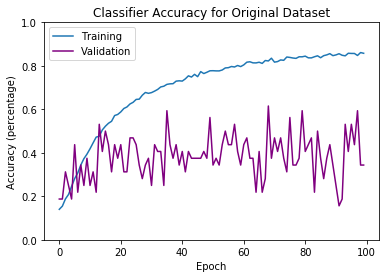

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], label="Training")
plt.plot(history.history['val_acc'], label="Validation", c='purple')
plt.ylim((0, 1))
plt.ylabel("Accuracy (percentage)")
plt.xlabel("Epoch")
plt.title("Classifier Accuracy for Original Dataset")
plt.legend()


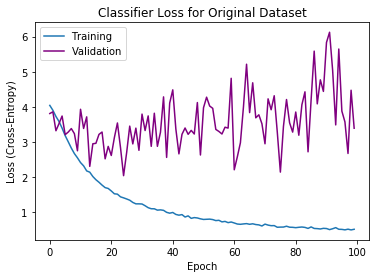

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label="Validation", c='purple')
plt.ylabel("Loss (Cross-Entropy)")
plt.xlabel("Epoch")
plt.title("Classifier Loss for Original Dataset")
plt.legend()

In [0]:
print(history.history)

{'val_loss': [3.8122141361236572, 3.860191822052002, 3.3222291469573975, 3.5263752937316895, 3.7408523559570312, 3.2110774517059326, 3.2849197387695312, 3.3840787410736084, 3.2399888038635254, 2.7523226737976074, 3.9328255653381348, 3.3875255584716797, 3.7173752784729004, 2.3088693618774414, 2.9514031410217285, 2.965082883834839, 3.218356132507324, 3.2856030464172363, 2.5234341621398926, 2.8770627975463867, 2.6191389560699463, 3.125389814376831, 3.543398380279541, 2.8423361778259277, 2.0446979999542236, 2.702136516571045, 3.4541993141174316, 2.947829246520996, 3.3966031074523926, 2.7653698921203613, 3.795637607574463, 3.3281092643737793, 3.7443575859069824, 2.878854513168335, 3.820699691772461, 2.878758430480957, 3.2802932262420654, 4.285663604736328, 2.563904285430908, 4.110161781311035, 4.485726356506348, 3.3735647201538086, 2.6641268730163574, 3.220952033996582, 3.400418758392334, 3.22044038772583, 3.3324215412139893, 3.229726791381836, 4.124174118041992, 2.6323513984680176, 3.97671

### Visualizing Class-Wise Accuracy

In [0]:
# getting the class labels for the model
classes = train_gen.class_indices

In [0]:
# making wrapper folders in order to evaluate class-wise accuracy
# for each pokemon in the dataset
path = 'original_data_clean/validation'
for pokemon in os.listdir(path):
  if pokemon[0] != '.':

    # creating a wrapper folder in the directory
    wrapper_dir = os.path.join(path, "wrapper_{}".format(pokemon))
    os.mkdir(wrapper_dir)

    # moving the current folder to inside the wrapper folder
    cur_dir = os.path.join(path, pokemon)
    new_dir = os.path.join(wrapper_dir, pokemon)
    os.rename(cur_dir, new_dir)

In [0]:
# evaluating class-wise accuracy
accuracy = {}

# for each pokemon in the directory
for pokemon in os.listdir(path):
  if pokemon[0] != '.':

    # creating a data generator for just that class
    test_gen = test_datagen.flow_from_directory(path + '/{}'.format(pokemon),
                                            target_size=(224, 224),
                                            color_mode = "rgb",
                                            batch_size=32,
                                            class_mode='categorical', 
                                            shuffle=True, seed=333)
    
    # getting the output of the model on that class
    output = model.predict_generator(test_gen, workers=4, 
                                     use_multiprocessing=True, verbose=1)
    
    # getting prediction from class outputs
    preds = np.argmax(output, axis=1)

    # computing number of correct predictions
    pokemon_name = pokemon.replace("wrapper_", "")
    correct = np.count_nonzero(preds == classes[pokemon_name])

    # calculating accuracy as number of correct predictions/ total predictions
    acc = correct / np.size(preds)

    # saving accuracy in the dictionary
    accuracy[pokemon] = acc

    # printing results
    print("{}: {}. Correct = {}, Total = {}".format(pokemon, acc, correct, 
                                                    np.size(preds)))

    



Found 13 images belonging to 1 classes.
1/1 [==============================] - 0s 283ms/step
wrapper_Nidorino: 0.38461538461538464. Correct = 5, Total = 13
Found 13 images belonging to 1 classes.
1/1 [==============================] - 1s 720ms/step
wrapper_Poliwhirl: 0.23076923076923078. Correct = 3, Total = 13
Found 11 images belonging to 1 classes.
1/1 [==============================] - 0s 280ms/step
wrapper_Charizard: 0.36363636363636365. Correct = 4, Total = 11
Found 14 images belonging to 1 classes.
1/1 [==============================] - 0s 320ms/step
wrapper_Nidoqueen: 0.14285714285714285. Correct = 2, Total = 14
Found 12 images belonging to 1 classes.
1/1 [==============================] - 0s 318ms/step
wrapper_Rhydon: 0.4166666666666667. Correct = 5, Total = 12
Found 14 images belonging to 1 classes.
1/1 [==============================] - 0s 345ms/step
wrapper_Lickitung: 0.5714285714285714. Correct = 8, Total = 14
Found 12 images belonging to 1 classes.
1/1 [===================

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2/2 [==============================] - 12s 6s/step
wrapper_Mewtwo: 0.8387096774193549. Correct = 52, Total = 62
Found 14 images belonging to 1 classes.
1/1 [==============================] - 5s 5s/step
wrapper_Golbat: 0.42857142857142855. Correct = 6, Total = 14
Found 15 images belonging to 1 classes.
1/1 [==============================] - 6s 6s/step
wrapper_Raichu: 0.3333333333333333. Correct = 5, Total = 15
Found 12 images belonging to 1 classes.
1/1 [==============================] - 5s 5s/step
wrapper_Kabuto: 0.4166666666666667. Correct = 5, Total = 12
Found 13 images belonging to 1 classes.
1/1 [==============================] - 4s 4s/step
wrapper_Hitmonchan: 0.23076923076923078. Correct = 3, Total = 13
Found 14 images belonging to 1 classes.
1/1 [==============================] - 6s 6s/step
wrapper_Electrode: 0.2857142857142857. Correct = 4, Total = 14
Found 13 images belonging to 1 classes.
1/1 [==============================] - 6s 6s/step
wrapper_Metapod: 0.46153846153846156. C

In [0]:
print(accuracy.items())

dict_items([('wrapper_Nidorino', 0.38461538461538464), ('wrapper_Poliwhirl', 0.23076923076923078), ('wrapper_Charizard', 0.36363636363636365), ('wrapper_Nidoqueen', 0.14285714285714285), ('wrapper_Rhydon', 0.4166666666666667), ('wrapper_Lickitung', 0.5714285714285714), ('wrapper_Nidorina', 0.4166666666666667), ('wrapper_Dragonite', 0.23076923076923078), ('wrapper_Farfetchd', 0.46153846153846156), ('wrapper_Venomoth', 0.46153846153846156), ('wrapper_Paras', 0.2727272727272727), ('wrapper_Arbok', 0.46153846153846156), ('wrapper_Dratini', 0.5454545454545454), ('wrapper_Hitmonlee', 0.46153846153846156), ('wrapper_Exeggcute', 0.25), ('wrapper_Mew', 0.35714285714285715), ('wrapper_Cubone', 0.0), ('wrapper_Jynx', 0.5), ('wrapper_MrMime', 0.4166666666666667), ('wrapper_Slowbro', 0.07692307692307693), ('wrapper_Dewgong', 0.14285714285714285), ('wrapper_Golem', 0.46153846153846156), ('wrapper_Ekans', 0.2727272727272727), ('wrapper_Caterpie', 0.3), ('wrapper_Grimer', 0.0), ('wrapper_Tangela', 0.3

In [0]:
np.histogram(list(accuracy.values()))

(array([14, 15, 26, 29, 25, 21,  7,  5,  4,  3]),
 array([0.        , 0.09166667, 0.18333333, 0.275     , 0.36666667,
        0.45833333, 0.55      , 0.64166667, 0.73333333, 0.825     ,
        0.91666667]))

Text(0.5, 1.0, 'Distribution of Class-Wise Test Accuracy')

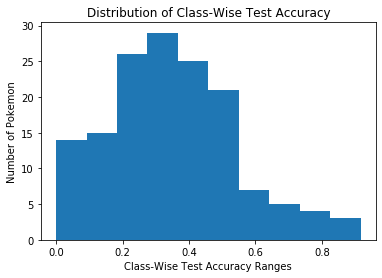

In [0]:
plt.hist(list(accuracy.values()), bins=10, histtype='bar')
plt.xlabel("Class-Wise Test Accuracy Ranges")
plt.ylabel("Number of Pokemon")
plt.title("Distribution of Class-Wise Test Accuracy")

### Exploring link Between Number of Training Image and Test Accuracy

In [0]:
# creating a dictionary with number of training examples per pokemon
counts = {}
for pokemon in os.listdir('original_data_clean/train'):
    if pokemon[0] != '.':
      name = pokemon.replace("wrapper_", "")
      counts[name] = len(os.listdir('original_data_clean/train/{}'.format(pokemon)))

In [0]:
print(counts.items())

dict_items([('Nidoqueen', 51), ('Farfetchd', 51), ('Poliwhirl', 51), ('Charizard', 41), ('Nidorina', 47), ('Lickitung', 53), ('Nidorino', 50), ('Arbok', 50), ('Venomoth', 52), ('Exeggcute', 45), ('Cubone', 47), ('Dratini', 87), ('Dragonite', 49), ('Rhydon', 47), ('Hitmonlee', 52), ('Paras', 44), ('Mew', 53), ('Kakuna', 53), ('Golem', 51), ('Caterpie', 39), ('MrMime', 47), ('Grimer', 51), ('Jynx', 47), ('Slowbro', 50), ('Tangela', 50), ('Ekans', 41), ('Nidoking', 54), ('Wartortle', 48), ('Dewgong', 52), ('Parasect', 42), ('Electabuzz', 42), ('Exeggutor', 54), ('Pidgey', 59), ('Persian', 45), ('Tauros', 53), ('Dodrio', 52), ('Meowth', 56), ('Psyduck', 127), ('Ponyta', 52), ('Omastar', 45), ('Bulbasaur', 231), ('Horsea', 50), ('Slowpoke', 48), ('Oddish', 52), ('Machoke', 40), ('Poliwrath', 50), ('Growlithe', 54), ('Lapras', 56), ('Tentacool', 45), ('Geodude', 44), ('Vulpix', 54), ('Pidgeot', 52), ('Porygon', 44), ('Ditto', 39), ('Koffing', 52), ('Wigglytuff', 53), ('Dugtrio', 51), ('Macho

Text(0.5, 1.0, 'Number of Training Examples vs. Test Accuracy')

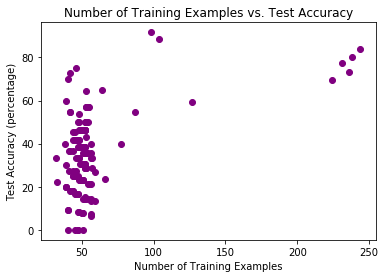

In [0]:
# plotting number of training examples vs accuracy
acc, freq = [], []

for pokemon in os.listdir('original_data_clean/validation'):
  if pokemon[0] != '.':
    name = pokemon.replace("wrapper_", "")
    freq.append(counts[name])
    acc.append(accuracy[pokemon] * 100)

plt.scatter(freq, acc, c='purple')
plt.xlabel("Number of Training Examples")
plt.ylabel("Test Accuracy (percentage)")
plt.title("Number of Training Examples vs. Test Accuracy")

In [0]:
# calculating the pearson correlation
from scipy.stats import pearsonr

In [0]:
pearsonr(freq, acc)

(0.4915997596931797, 1.935458418232572e-10)